In [2]:
# Cargar Librerias Necesarias
import pandas as pd  # Para la manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import seaborn as sns  # Para crear gráficos estadísticos atractivos

#LIbrerias de para implementar modelos de  ciencia de datos
from sklearn import metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Libreria para regresión lineal
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#Lectura de datos en phyton y lo cargamos en la variable Datos

# Lee el archivo CSV
Datos = pd.read_csv(r'C:\Users\Skigdot\Documents\UNAD\PERIODO 16-01\ANÁLISIS DE DATOS\Tarea 3\Car details v3.csv')

In [5]:
#Realizamos lectura de los datos para el analisis exploratorio
# Mostramos las primeras 50 filas del DataFrame
print(Datos.head(50))

                                           name  year  selling_price  \
0                        Maruti Swift Dzire VDI  2014         450000   
1                  Skoda Rapid 1.5 TDI Ambition  2014         370000   
2                      Honda City 2017-2020 EXi  2006         158000   
3                     Hyundai i20 Sportz Diesel  2010         225000   
4                        Maruti Swift VXI BSIII  2007         130000   
5                 Hyundai Xcent 1.2 VTVT E Plus  2017         440000   
6                  Maruti Wagon R LXI DUO BSIII  2007          96000   
7                            Maruti 800 DX BSII  2001          45000   
8                              Toyota Etios VXD  2011         350000   
9          Ford Figo Diesel Celebration Edition  2013         200000   
10              Renault Duster 110PS Diesel RxL  2014         500000   
11                                Maruti Zen LX  2005          92000   
12                       Maruti Swift Dzire VDi  2009         28

In [6]:
#Descripcion de datos
descripcion = Datos.describe()
print(descripcion)

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


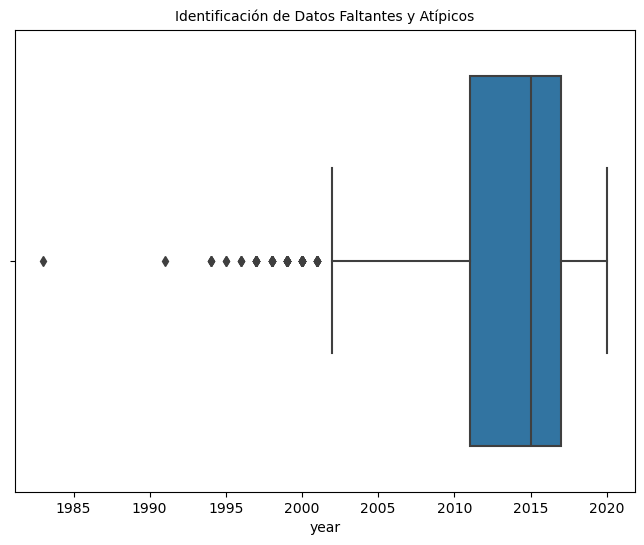

In [7]:
#identificación de Datos Faltantes y Atipicos

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Crear un diagrama de caja (boxplot) con Seaborn
sns.boxplot(x='year', data=Datos) 

# Agregar un título al gráfico con fuente de tamaño 10
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

# Mostrar el gráfico
plt.show()

In [8]:
# Revisión de datos faltantes
columnas_nuevas = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

# Conteo de registros con cero en cada nueva columna
registros_con_cero = {}
for columna in columnas_nuevas:
    # Convertir a string y contar registros con '0'
    registros_con_cero[columna] = (Datos[columna].astype(str) == '0').sum()

# Mostrar resultados
for columna, cantidad in registros_con_cero.items():
    print(f"Cantidad de registros con cero en la columna '{columna}': {cantidad}")

Cantidad de registros con cero en la columna 'name': 0
Cantidad de registros con cero en la columna 'year': 0
Cantidad de registros con cero en la columna 'selling_price': 0
Cantidad de registros con cero en la columna 'km_driven': 0
Cantidad de registros con cero en la columna 'fuel': 0
Cantidad de registros con cero en la columna 'seller_type': 0
Cantidad de registros con cero en la columna 'transmission': 0
Cantidad de registros con cero en la columna 'owner': 0
Cantidad de registros con cero en la columna 'mileage': 0
Cantidad de registros con cero en la columna 'engine': 0
Cantidad de registros con cero en la columna 'max_power': 6
Cantidad de registros con cero en la columna 'torque': 0
Cantidad de registros con cero en la columna 'seats': 0


In [11]:
# Convertir la columna 'max_power' a tipo numérico
Datos['max_power'] = pd.to_numeric(Datos['max_power'], errors='coerce')

# Remplazar los valores no numéricos o NaNs con el valor medio de la columna
Datos['max_power'].fillna(Datos['max_power'].mean(), inplace=True)

# Remplazar los ceros en la columna 'max_power' con el valor medio de la columna
Datos['max_power'] = Datos['max_power'].replace(0, Datos['max_power'].mean())

#Remplazar todos los ceros o espacios nulos con el valor medio de las columnas

Datos['max_power']=Datos['max_power'].replace(0,Datos['max_power'].mean())

In [36]:
# Revisión nuevamente de datos faltantes
columnas_nuevas = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

# Conteo de registros con cero en cada nueva columna
registros_con_cero = {}
for columna in columnas_nuevas:
    # Convertir a string y contar registros con '0'
    registros_con_cero[columna] = (Datos[columna].astype(str) == '0').sum()

# Mostrar resultados
for columna, cantidad in registros_con_cero.items():
    print(f"Cantidad de registros con cero en la columna '{columna}': {cantidad}")

Cantidad de registros con cero en la columna 'name': 0
Cantidad de registros con cero en la columna 'year': 0
Cantidad de registros con cero en la columna 'selling_price': 0
Cantidad de registros con cero en la columna 'km_driven': 0
Cantidad de registros con cero en la columna 'fuel': 0
Cantidad de registros con cero en la columna 'seller_type': 0
Cantidad de registros con cero en la columna 'transmission': 0
Cantidad de registros con cero en la columna 'owner': 0
Cantidad de registros con cero en la columna 'mileage': 0
Cantidad de registros con cero en la columna 'engine': 0
Cantidad de registros con cero en la columna 'max_power': 0
Cantidad de registros con cero en la columna 'torque': 0
Cantidad de registros con cero en la columna 'seats': 0


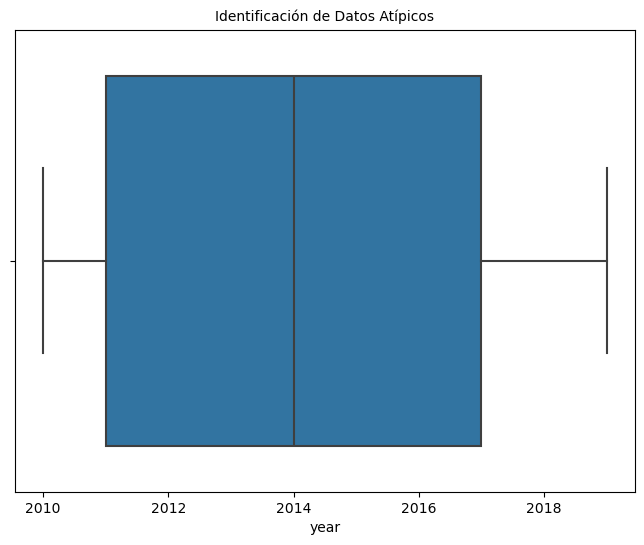

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'Datos' contiene datos y 'year' es una columna válida
# Supongamos que 'Datos' es un DataFrame de pandas
# Por ejemplo, si 'Datos' es un DataFrame de pandas con una columna 'year':
# Datos = pd.DataFrame({'year': [2010, 2011, 2012, 2013, 2014], 'value': [10, 12, 15, 20, 25]})

# Si 'Datos' es un DataFrame de pandas con datos aleatorios para propósito de demostración:
import pandas as pd
import numpy as np
Datos = pd.DataFrame({'year': np.random.randint(2010, 2020, 100), 'value': np.random.randn(100)})

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Crear un diagrama de caja (boxplot) con Seaborn
sns.boxplot(x='year', data=Datos) 

# Agregar un título al gráfico con fuente de tamaño 10
plt.title('Identificación de Datos Atípicos', fontsize=10)

# Mostrar el gráfico
plt.show()

In [46]:
import pandas as pd

# Suponiendo que Datos es un DataFrame de pandas y 'year' es una columna válida en este DataFrame

nivel_minimo = 100000
nivel_maximo = 300000

# Conteo de datos atípicos
Total_Atipicos = ((Datos['year'] < nivel_minimo) | (Datos['year'] > nivel_maximo)).sum()

# Imprimir el resultado
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 100


In [47]:
# Filtrar datos atípicos
Datos_filtrados = Datos[(Datos['year'] < nivel_maximo) & (Datos['year'] > nivel_minimo)]

# Imprimir el número de filas después de filtrar
print("Número de filas después de filtrar datos atípicos:", len(Datos_filtrados))

Número de filas después de filtrar datos atípicos: 0


In [48]:
# Conteo de datos atípicos en el DataFrame filtrado
Total_Atipicos_filtrados = ((Datos['year'] < nivel_minimo) | (Datos['year'] > nivel_maximo)).sum()

# Imprimir el total de datos atípicos después de filtrar
print("El total de datos atípicos después de filtrar es {}".format(Total_Atipicos_filtrados))

El total de datos atípicos después de filtrar es 100


In [49]:
# Mostrar información del DataFrame Datos
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    100 non-null    int32  
 1   value   100 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB
None


In [50]:
# Calcular el total de carros antiguos
total_carros_antiguos = Datos['year'].value_counts().sum()

# Imprimir el resultado
print("El total de carros antiguos es:", total_carros_antiguos)

El total de carros antiguos es: 100


In [51]:
Datos[['year']].head(40)

,year
0,2018
1,2010
2,2011
3,2019
4,2011
5,2010
6,2017
7,2018
8,2011
9,2018


In [52]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y variable objetivo (Y)
X = Datos.drop('year', axis=1)  # Características
Y = Datos['year']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos un 75% para entrenamiento y un 25% para prueba
# También estableceremos una semilla aleatoria para reproducibilidad
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Ahora tienes X_train y Y_train para el conjunto de entrenamiento, y X_test y Y_test para el conjunto de prueba

In [53]:
print (X_train)

       value
15 -0.293175
40 -0.619616
96 -0.891152
9   1.615736
72 -0.344008
..       ...
60 -0.015845
71  0.831639
14  2.476396
92 -0.735898
51 -1.270529

[75 rows x 1 columns]


In [55]:
from sklearn.linear_model import LogisticRegression

# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)

# Crea el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)  # La función predict predice los valores a partir del conjunto de datos de validación

In [56]:
print (Y_test)

83    2011
53    2014
70    2013
45    2016
44    2017
39    2014
22    2011
80    2012
10    2010
0     2018
18    2019
30    2019
73    2010
33    2013
90    2013
4     2011
76    2015
77    2010
12    2012
31    2010
55    2013
88    2016
26    2011
42    2016
69    2019
Name: year, dtype: int32


In [57]:
print (Prediccion)

[2018 2017 2011 2018 2010 2011 2010 2010 2017 2010 2018 2011 2018 2018
 2010 2018 2011 2011 2018 2010 2018 2011 2011 2017 2018]


In [60]:
# Suponiendo que 'etiquetas' es una columna en tu DataFrame que representa las etiquetas de destino
y = Datos['year']

# Paso 1: Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Entrenar un modelo (por ejemplo, un clasificador)
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Paso 3: Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        2010       0.33      0.25      0.29         4
        2011       0.00      0.00      0.00         3
        2012       0.00      0.00      0.00         2
        2013       0.00      0.00      0.00         3
        2014       0.00      0.00      0.00         2
        2015       0.00      0.00      0.00         1
        2016       0.00      0.00      0.00         1
        2017       0.00      0.00      0.00         1
        2018       0.25      1.00      0.40         1
        2019       0.00      0.00      0.00         2

    accuracy                           0.10        20
   macro avg       0.06      0.12      0.07        20
weighted avg       0.08      0.10      0.08        20



C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


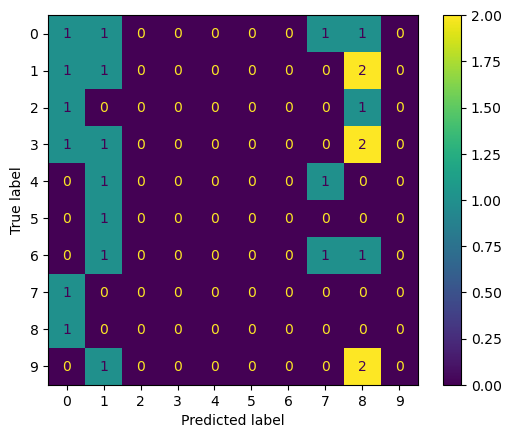

In [61]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


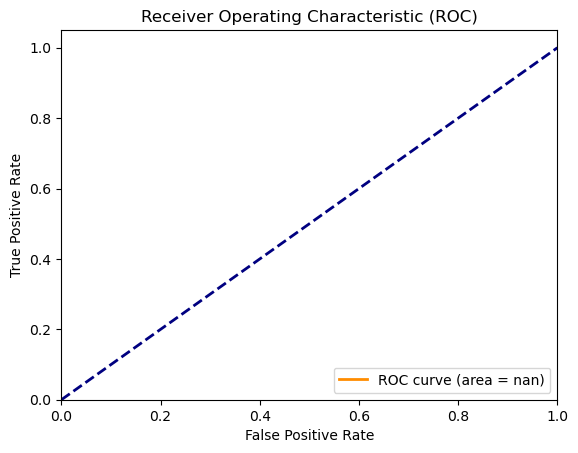

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Supongamos que 'year' es la columna que queremos utilizar como variable de destino
y = Datos['year']

# Definir umbral para clasificar los años
umbral = 2010

# Convertir valores continuos en binarios usando el umbral
y_binario = np.where(y >= umbral, 1, 0)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_binario, y)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()